In [4]:
# import torch
# from torch import nn

# #inport torchvision
# import torchvision
# from torchvision import datasets
# from torchvision import transforms
# from torchvision.transforms import ToTensor

# import matplotlib.pyplot as plt

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt



getting the dataset

In [6]:
# #setup training data
# train_data=datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor(),
#     target_transform=None
# )

# test_data=datasets.FashionMNIST(
#     root='data',
#     train=False,
#     download=True,
#     transform=ToTensor(),
#     target_transform=None
# )


#setting up training data
train_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

#setting up testing data
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)


checking the first sample of trainining data

In [7]:
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

checking the shape of input

In [11]:
image.shape

(torch.Size([1, 28, 28]), 9)

checking the length of our data

In [13]:
len(train_data),len(test_data)

(60000, 10000)

In [20]:
class_names=train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

visualizing the data

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

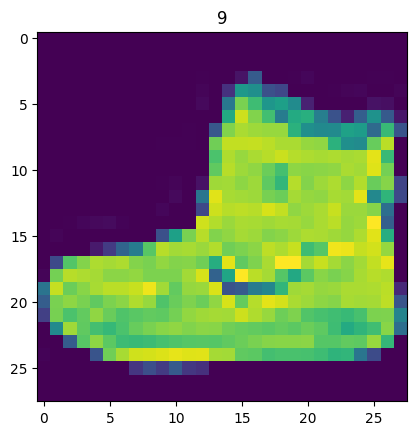

In [24]:
image,label=train_data[0]
print(f'image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

converting to grayscale

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

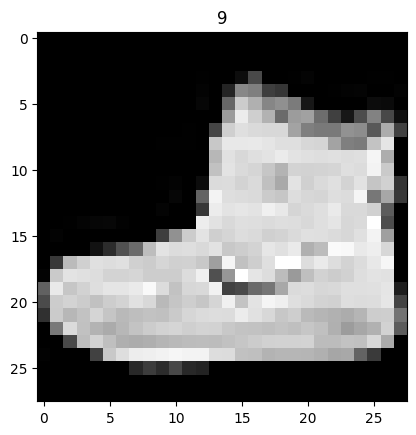

In [25]:
image,label=train_data[0]
print(f'image shape: {image.shape}')
plt.imshow(image.squeeze(),cmap='gray')
plt.title(label)

more insights on data

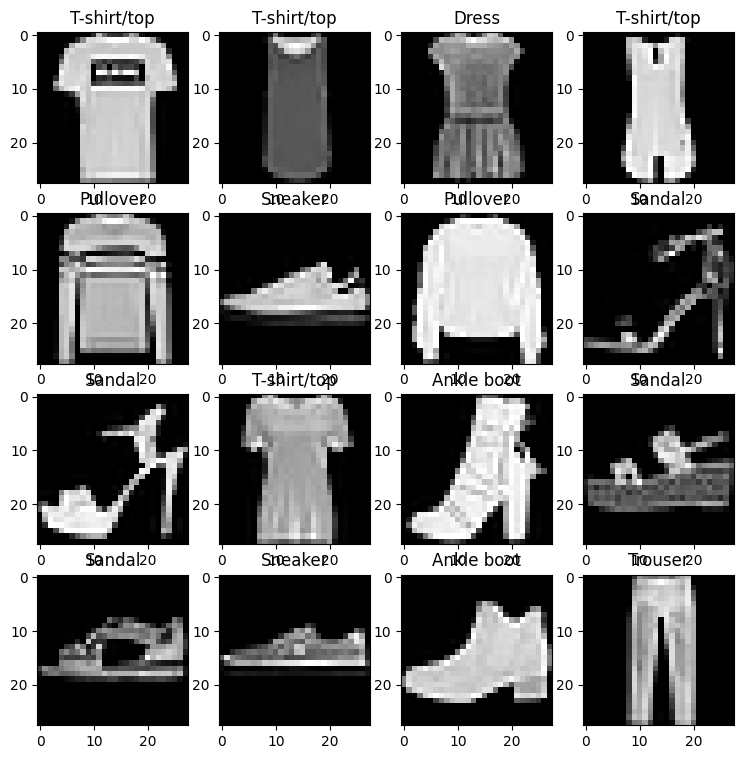

In [31]:
torch.manual_seed(42)
rows,cols=4,4
fig=plt.figure(figsize=(9,9))
for i in range(1,rows*cols+1):
  image,label=train_data[i]
  """or you can write
  random_idx=torch.randidx(0,len(train_data),size=[1]).item()
  image,label=train-data[random_idx]    this random_idx is used to generate the random value from range 0 to len(train_data|)"""
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap='gray')
  plt.title(class_names[label])

preparing the data loader

In [32]:
from torch.utils.data import DataLoader
#data loader is similar to its name, it is used to load data in model in different batches
Batch_size=32

#turning datasets into iterables/batches
train_dataloader=DataLoader(
    train_data,
    batch_size=Batch_size,
    shuffle=True

)

test_dataloader=DataLoader(
    test_data,
    batch_size=Batch_size,
    shuffle=False

)

#lets check out what have we created so far
print(f'dataloaders: {train_dataloader,test_dataloader}')

print(f'length of train_dataloader: {len(train_dataloader)}, batches of {Batch_size}')

print(f'length of test_dataloader: {len(test_dataloader)}, batches of {Batch_size}')

dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79a339387310>, <torch.utils.data.dataloader.DataLoader object at 0x79a339386890>)
length of train_dataloader: 1875, batches of 32
length of test_dataloader: 313, batches of 32


In [33]:
#checking out what is inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size : torch.Size([1, 28, 28])
label size : torch.Size([])


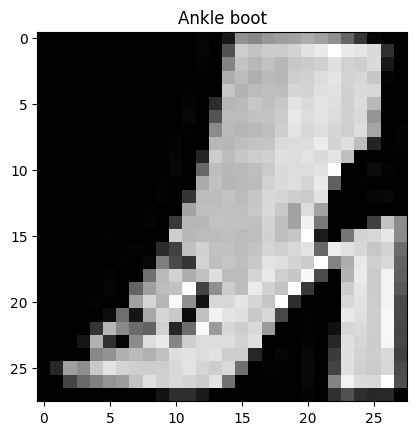

In [42]:
#seeing that the data remains unchangedby checking a simple sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
image,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
print(f'image size : {image.shape}')

print(f'label size : {label.shape}')

# Building a baseline model ie Model 0

In [46]:
flatten_model=nn.Flatten()

#getting a single sample
x=train_features_batch[0]

#flatteing the sample
output=flatten_model(x)

#pringting out what happened
print(f'shape before flattening: {x.shape}')

print(f'shape after flattening: {output.shape}')


shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [47]:
from torch import nn
class fashionMNISTmodel0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),

        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
    )

  def forward(self,x):
    return self.layer_stack(x)

lets create and instance of our model and send to cpu

In [49]:
torch.manual_seed(42)

#settingup model with input parameters
model_0=fashionMNISTmodel0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to('cpu')  #keeping the model on cpu to begin with

fashionMNISTmodel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

# setting up loss, otpitmizer and evaluation metrics

In [51]:
import requests
from pathlib import Path

#downloading helper functions
if Path('helper_functions.py').is_file():
  print('already exists, skipping download')

else:
  print("downloading")
  request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)


downloading


In [53]:
#importing accuracy matrices

from helper_functions import accuracy_fn

#settingup loss and optimizer fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [55]:
#creating the function to time our experiment
#this part is not important , just for practise and fun

from timeit import default_timer as timer
def print_train_time(start:float, end: float,device:torch.device=None):
  total_time=end-start
  print(f'time taken on device : {total_time} sec')
  return total_time

# creating a training loop and trainig a model on batches of data

In [72]:
#importing a tqdm progress bar
from tqdm.auto import tqdm

#setting up the seed andtimer
torch.manual_seed(42)
train_time_start_on_cpu=timer()
#setting the no. of epochs
epochs=3

#creating a training and testing loop:
for epoch in tqdm(range(epochs)):
  print(f'epoch: {epoch}\n')

  #training
  train_loss=0
  for batch,(x,y) in enumerate(train_dataloader):
    model_0.train()

    #forward pass
    y_pred=model_0(x)

    #calculate loss per batch
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    #optimizer
    optimizer.zero_grad()

    #loss bacward
    loss.backward()

    optimizer.step()

    if batch%400==0:
      print(f'looked at {batch*len(x)}/len{train_dataloader.dataset} samples')


  #deviding the total train loss by length of train dataloader
  train_loss /=len(train_dataloader)

  #testing:
  #setting up vairables for accumulatively adding up loass and accuracy

  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x,y in test_dataloader:
      #forward pass
      test_pred=model_0(x)

      #calculate loss
      test_loss+=loss_fn(test_pred,y) #the less accuracy is due to space, debug it hehe

      #calculate accuracy
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

      test_loss /=len(test_dataloader)
      test_acc /=len(test_dataloader)

    print(f'\n train loss: {train_loss:.5f}  test loss: {test_loss:.5f}    test acc: {test_acc:.2f}\n')

train_time_to_end_on_cpu=timer()
total_train_time_model0=print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_to_end_on_cpu,
    device=str(next(model_0.parameters()).device)
                                         )


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0

looked at 0/lenDataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples
looked at 12800/lenDataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples
looked at 25600/lenDataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples
looked at 38400/lenDataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples
looked at 51200/lenDataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples

 train loss: 0.39717  test loss: 0.00141    test acc: 0.26

epoch: 1

looked at 0/lenDataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Sp